<a href="https://colab.research.google.com/github/JayantJharkhande3000/Assignment/blob/master/AM5630_ASSIGNMENT_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AM5630: Foundations of Computational Fluid Dynamics
# Computer Assignment – 3
# Jayant Jharkhande (OE21D015)


# *Lid Driven Cavity*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the system parameters 
length = 1
print("\n The lenght of the system is : ", length)
delx = 0.01
print("\n The grid distance in the system is : ", delx)
ua=1
print("\n The velocity of the top layer in the system is : ", ua)

# creating the grid length
n=int(length/delx)+1
print("\n The total number of blocks in the system is : ", n)

# Creating arrays for 
si1=np.zeros((int(n),int(n)))
si2=np.zeros((int(n),int(n)))
w1=np.zeros((int(n),int(n)))
w2=np.zeros((int(n),int(n)))
u=np.zeros((int(n),int(n)))
v=np.zeros((int(n),int(n)))
D=np.zeros((int(n),int(n)))
P1=np.zeros((int(n),int(n)))
P2=np.zeros((int(n),int(n)))
M=np.zeros((int(n),int(n)))
x1=np.zeros(int(n))
v1=np.zeros(int(n))
x=np.zeros(int(n))
d=100
m=0
w=100


 The lenght of the system is :  1

 The grid distance in the system is :  0.01

 The velocity of the top layer in the system is :  1

 The total number of blocks in the system is :  101


In [2]:
# Setting the error or convergence to 0.0001
while w>=.0001:
    w=0
    m=m+1
    # creating the loop 
    for i in range(0,int(n)):
        w1[i][0] = -2 * (si1[i][1]) / (delx * delx)
        w1[i][int(n)-1] = ((-2 * (si1[i][int(n)-2]) / (delx * delx)) - (2 * (1 / delx)))
        w1[0][i] = -2 * (si1[1][i]) / (delx * delx)
        w1[int(n)-1][i] = -2 * (si1[int(n)-2][i]) / (delx * delx)
        u[i][int(n)-1]=1
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            si2[i][j] = .25 * (delx * delx * w1[i][j] + si1[i + 1][j] + si2[i - 1][j] + si1[i][j + 1] + si2[i][j - 1])
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            u[i][j] = (si2[i][j + 1] - si2[i][j - 1]) / (2 * delx)
            v[i][j] = (si2[i - 1][j] - si2[i + 1][j]) / (2 * delx)
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            w2[i][j] = .25 * ((1 - 50 * delx * u[i][j]) * w1[i + 1][j] + (1 + 50 * delx * u[i][j]) * w1[i - 1][j] +
                              (1 - 50 * delx * v[i][j]) * w1[i][j + 1] + (1 + 50 * delx * v[i][j]) * w1[i][j - 1])
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            si1[i][j] = si2[i][j]
            w=w+abs(w1[i][j]-w2[i][j])
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            w1[i][j] = w2[i][j]
            d=d+D[i][j]
    if m==1 and m==2:
        w==100
dif=100
while dif>=.1:
    dif=0
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            P1[0][j] = P1[1][j]
            P1[int(n)-1][j] = P1[int(n)-2][j]
            P1[j][0] = P1[j][1]
            P1[j][int(n)-1] = P1[j][int(n)-2]
            M[i][j] = .5*((u[i+1][j]-u[i-1][j])*(v[i][j+1]-v[i][j-1])-(v[i+1][j]-v[i-1][j])*(u[i][j+1]-u[i][j-1]))/(delx*delx)
            P2[i][j] = .25 * (P1[i + 1][j] + P1[i - 1][j] + P1[i][j + 1] + P1[i][j - 1] - M[i][j]*delx*delx)
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            dif = dif + abs(P1[i][j] - P2[i][j])
    for i in range(1, int(n)-1):
        for j in range(1, int(n)-1):
            P1[i][j] = P2[i][j]





 stream function profile 




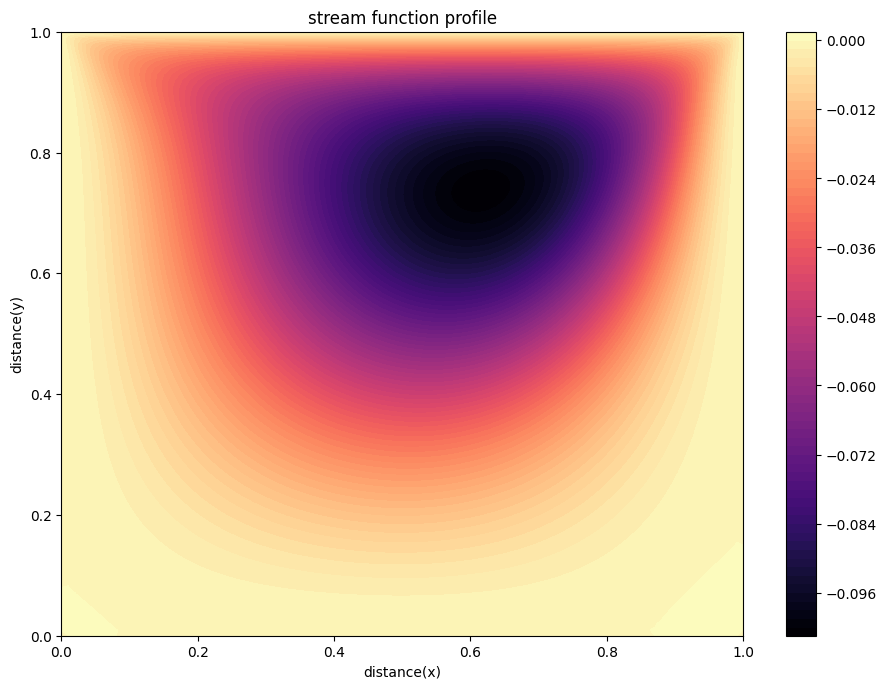



  vorticity profile 




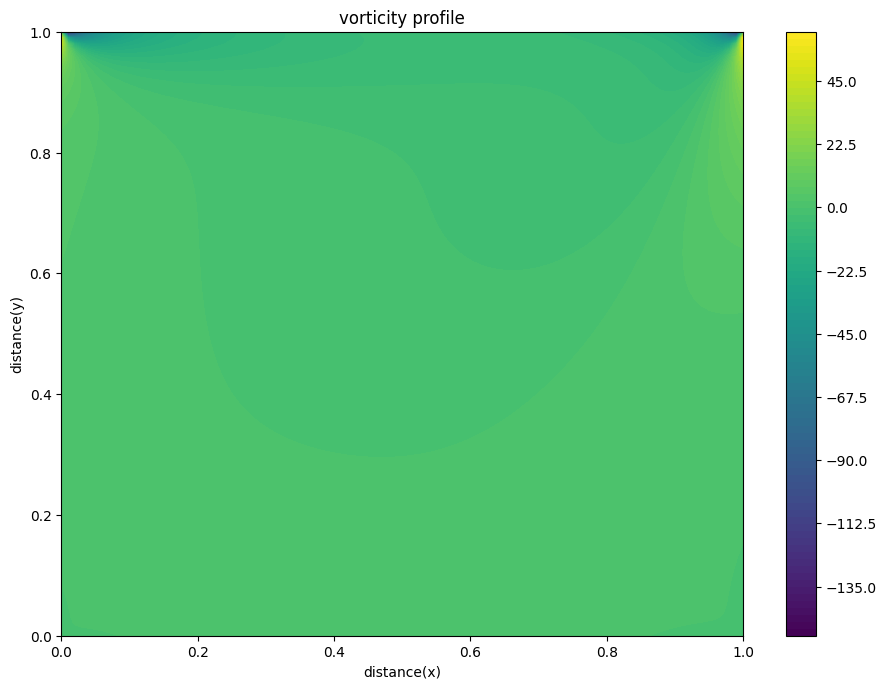



 pressure profile in the system  




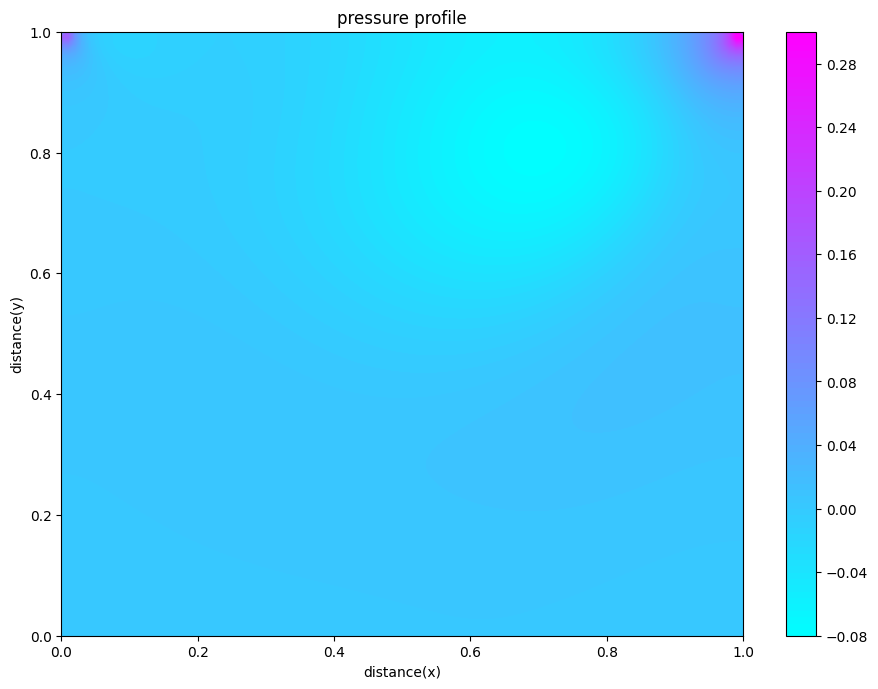

In [3]:
# Data Visualization 
print("\n\n stream function profile \n\n")            
x=np.arange(0,1+delx,delx)
y=np.arange(0,1+delx,delx)
X, Y=np.meshgrid(x,y)
fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlabel("distance(x)")
plt.ylabel("distance(y)")
plt.title("stream function profile")
plt.contourf(X,Y,si1.transpose(),100,cmap='magma')
plt.colorbar()
plt.show()

print("\n\n  vorticity profile \n\n")            
x=np.arange(0,1+delx,delx)
y=np.arange(0,1+delx,delx)
X, Y=np.meshgrid(x,y)
fig=plt.figure(figsize=(11,8),dpi=100)
plt.xlabel("distance(x)")
plt.ylabel("distance(y)")
plt.title("vorticity profile")
plt.contourf(X,Y,w1.transpose(),100,cmap='viridis')
plt.colorbar()
plt.show()

print("\n\n pressure profile in the system  \n\n")
x=np.arange(0,1+delx,delx)
y=np.arange(0,1+delx,delx)
X, Y=np.meshgrid(x,y)
fig=plt.figure(figsize=(11,8),dpi=100)
plt.contourf(X,Y,P1.transpose(),100,cmap='cool')
plt.xlabel("distance(x)")
plt.ylabel("distance(y)")
plt.title("pressure profile")
plt.colorbar()
plt.show()





 u velocities at x=.5 in the system  




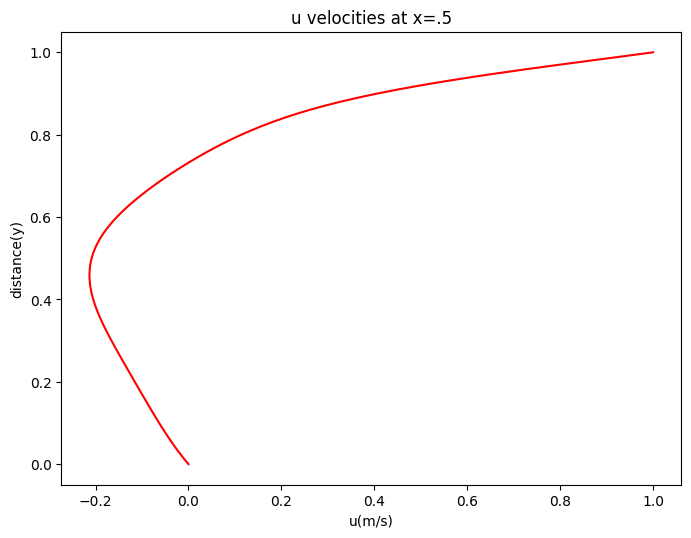



 v velocities at y=.5 in the system  




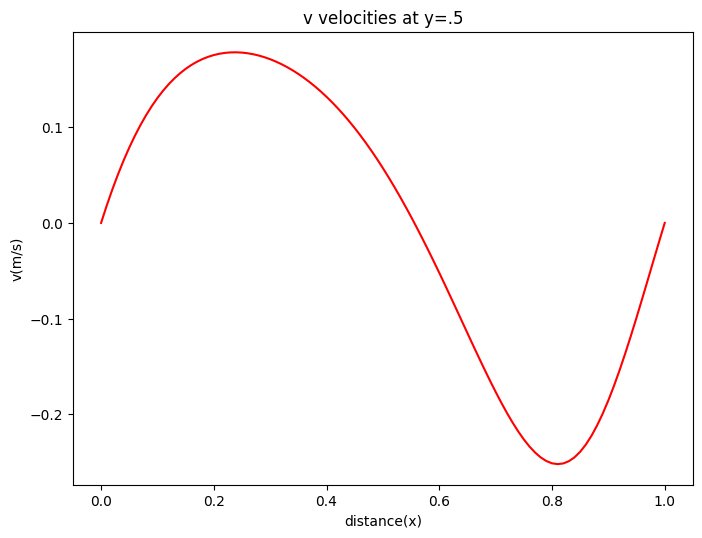

In [4]:
print("\n\n u velocities at x=.5 in the system  \n\n")
for i in range (0,int(n)):
    x1[i]=i/(int(n)-1)
    v1[i]=u[int((int(n)-1)/2)][i]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.plot(v1, x1, color='red')
plt.xlabel("u(m/s)")
plt.ylabel("distance(y)")
plt.title("u velocities at x=.5")
plt.show()

print("\n\n v velocities at y=.5 in the system  \n\n")
for i in range (0,int(n)):
    x1[i]=i/(int(n)-1)
    v1[i]=v[i][int((int(n)-1)/2)]
fig=plt.figure(figsize=(8,6),dpi=100)
plt.plot(x1, v1, color='red')
plt.xlabel("distance(x)")
plt.ylabel("v(m/s)")
plt.title("v velocities at y=.5")
plt.show()